In [153]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# STEP 1 DATA UNDERSTANDING

In [155]:
df = pd.read_excel("stroke.xlsx", sheet_name="data")

In [156]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,86.0,1.68,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked,1


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4914 non-null   float64
 10  weight_in_kg       4378 non-null   float64
 11  height_in_m        4378 non-null   float64
 12  smoking_status     5110 non-null   object 
 13  stroke             5110 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 559.0+ KB


In [158]:
# Drop irrelevant features
df = df.drop(columns=['id', 'stroke'])


In [159]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,86.0,1.68,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked


In [160]:
categorical_features = ['gender','hypertension', 'heart_disease', 'ever_married','smoking_status', 'work_type']

numerical_features = ['age', 'bmi', 'avg_glucose_level','weight_in_kg', 'height_in_m']


# STEP 2 DATA CLEANING

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  196
weight_in_kg         732
height_in_m          732
smoking_status         0
dtype: int64


<Axes: >

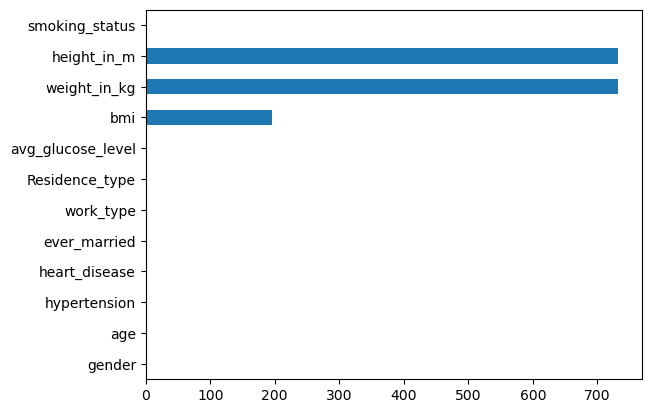

In [162]:
print(df.isna().sum())

df.isna().sum().plot.barh()

In [163]:
print("median of bmi",df['bmi'].median())


df['bmi']=df['bmi'].fillna(df['bmi'].median())




#fill the null of bmi using median

median of bmi 27.7


In [164]:
df['weight_in_kg']=df['weight_in_kg'].fillna(df['weight_in_kg'].median())
df['height_in_m']=df['height_in_m'].fillna(df['height_in_m'].median())


In [165]:
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
weight_in_kg         0
height_in_m          0
smoking_status       0
dtype: int64


#cap the outliers

In [167]:

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_condition = (df[numerical_features] < (Q1 - 1.5 * IQR)) | \
                    (df[numerical_features] > (Q3 + 1.5 * IQR))

# Determine which rows contain outliers (True/False)
outliers = outlier_condition.any(axis=1)

print(f"Number of outliers detected using IQR: {outliers.sum()}")

Number of outliers detected using IQR: 901


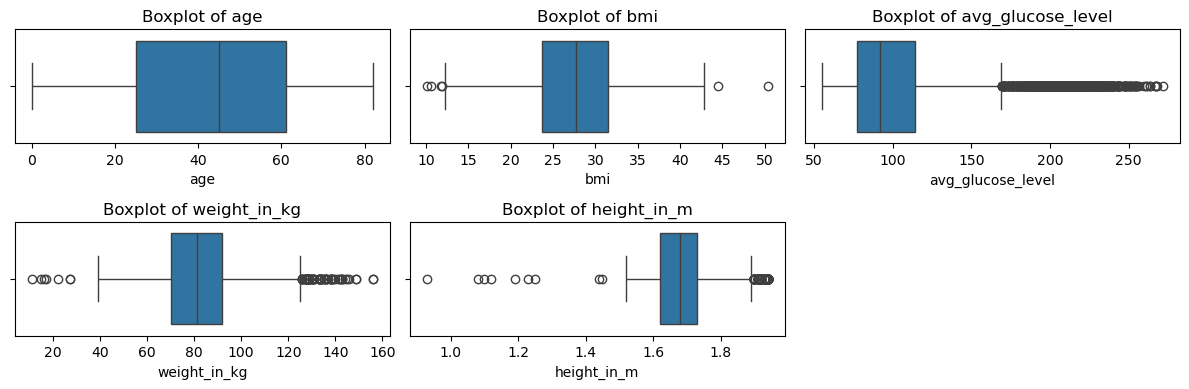

In [168]:

plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

Cap (Winsorize) to maintain sample size while reducing the impact of extreme values.

In [170]:
from scipy.stats.mstats import winsorize

df_capped = df.copy()
for feature in numerical_features:
    df_capped[feature] = winsorize(df_capped[feature], limits=[0.05, 0.05])

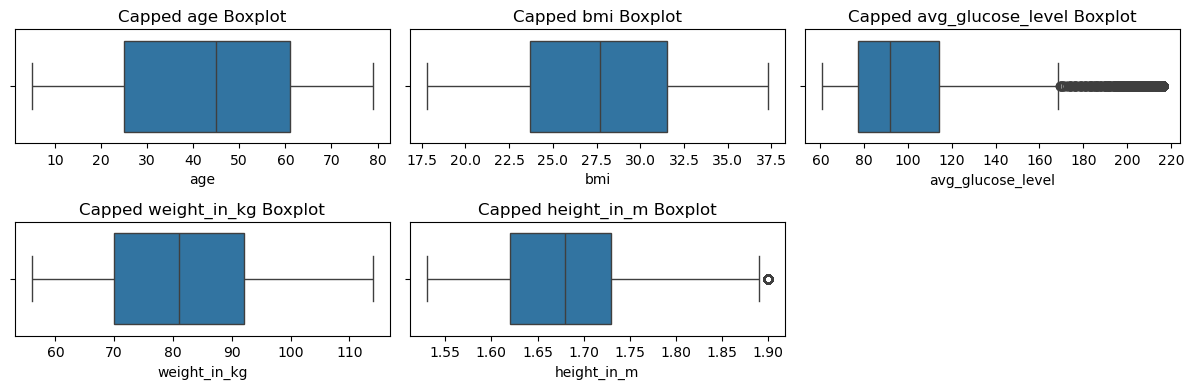

In [171]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_capped[feature])
    plt.title(f"Capped {feature} Boxplot")
plt.tight_layout()
plt.show()


# STEP 3 DATA TRANSFORMATION

In [173]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,86.0,1.68,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked


In [174]:
# data before scale

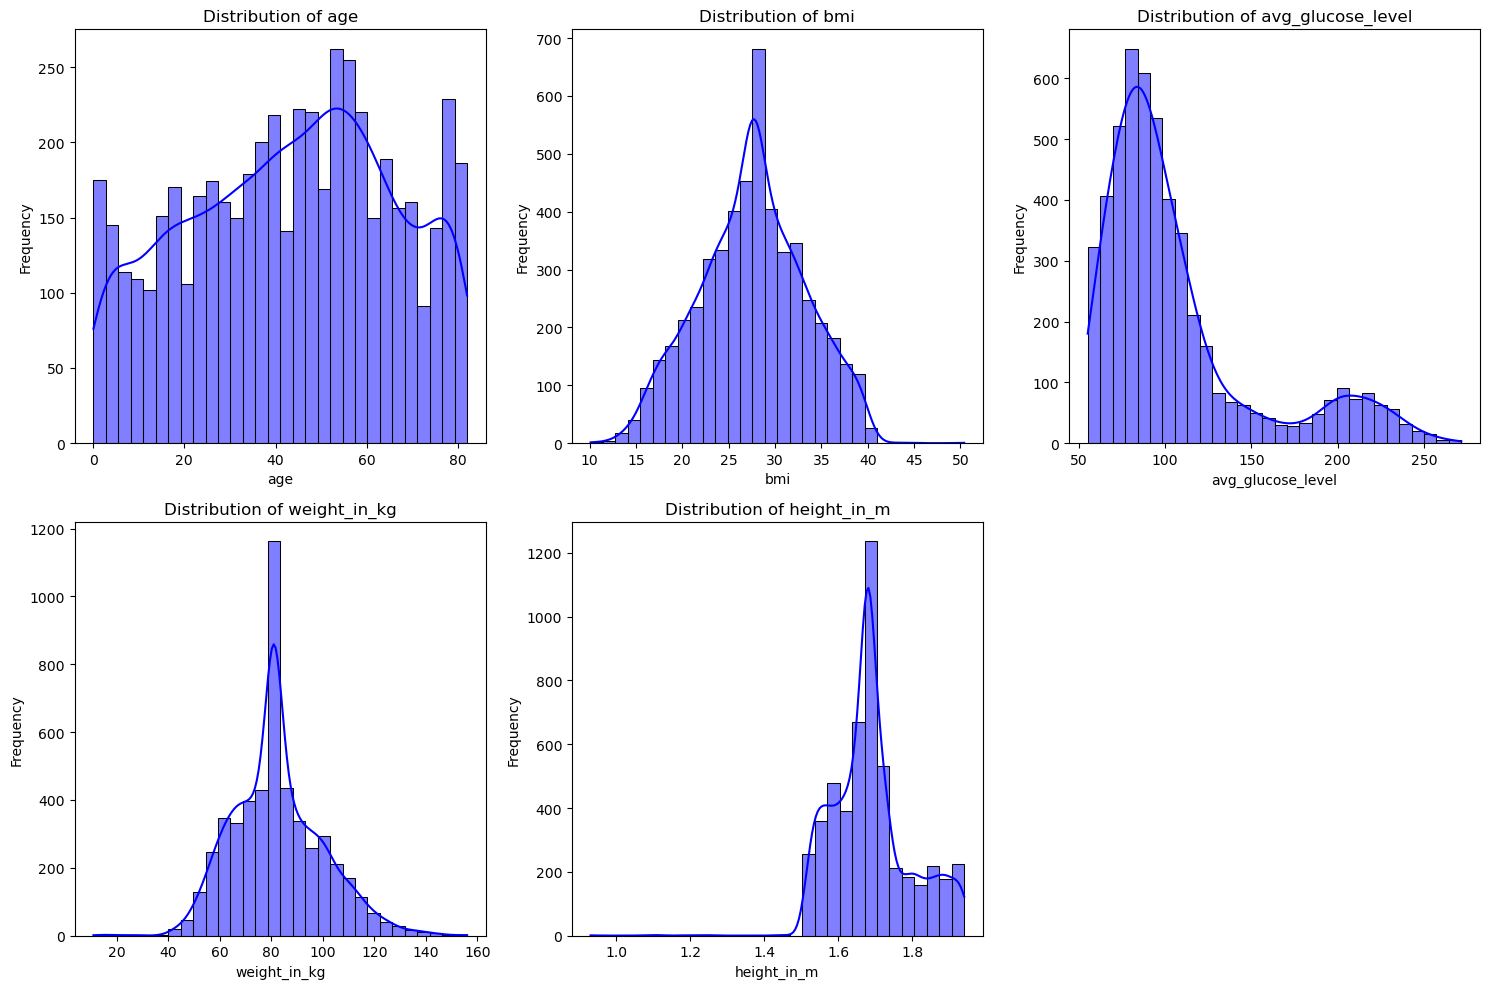

In [175]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue') 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

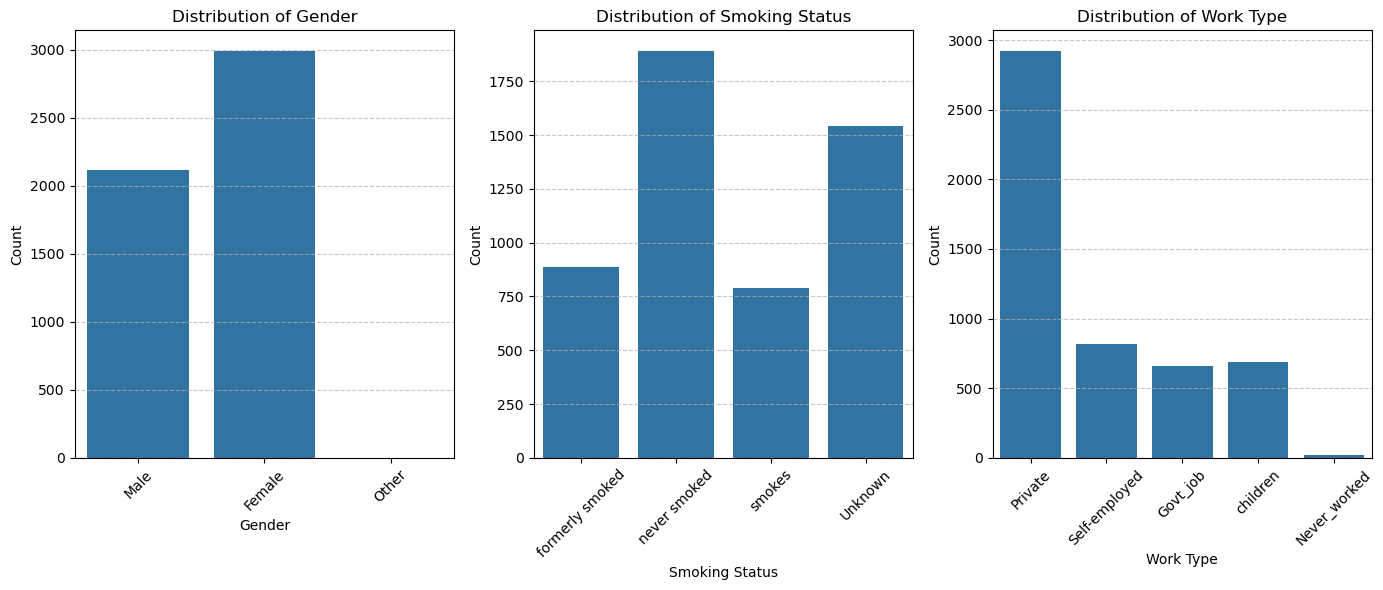

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Smoking status distribution
plt.subplot(1, 3, 2)  
sns.countplot(x='smoking_status', data=df) 
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Work type distribution
plt.subplot(1, 3, 3)  
sns.countplot(x='work_type', data=df) 
plt.title('Distribution of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Gender distribution
plt.subplot(1, 3, 1) 
sns.countplot(x='gender', data=df) 
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [195]:
#NORMALIZED THE DATA ON THE SAME SCALE

In [196]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform numerical features
df[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

# Verify scaling
print(df[numerical_features].head())


        age       bmi  avg_glucose_level  weight_in_kg  height_in_m
0  0.816895  0.657568           0.801265      0.724138     0.841584
1  0.743652  0.436725           0.679023      0.517241     0.742574
2  0.975586  0.558313           0.234512      0.558621     0.742574
3  0.597168  0.605459           0.536008      0.496552     0.613861
4  0.963379  0.344913           0.549349      0.358621     0.683168


In [197]:
print(df.head())


   gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  0.816895             0              1          Yes        Private   
1  Female  0.743652             0              0          Yes  Self-employed   
2    Male  0.975586             0              1          Yes        Private   
3  Female  0.597168             0              0          Yes        Private   
4  Female  0.963379             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level       bmi  weight_in_kg  height_in_m  \
0          Urban           0.801265  0.657568      0.724138     0.841584   
1          Rural           0.679023  0.436725      0.517241     0.742574   
2          Rural           0.234512  0.558313      0.558621     0.742574   
3          Urban           0.536008  0.605459      0.496552     0.613861   
4          Rural           0.549349  0.344913      0.358621     0.683168   

    smoking_status  
0  formerly smoked  
1     never smoked  

In [198]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          688
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [199]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [200]:
# Identify nominal categorical features
nominal_features = ['work_type', 'smoking_status']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Verify encoding
print(df.head())


   gender       age  hypertension  heart_disease ever_married Residence_type  \
0    Male  0.816895             0              1          Yes          Urban   
1  Female  0.743652             0              0          Yes          Rural   
2    Male  0.975586             0              1          Yes          Rural   
3  Female  0.597168             0              0          Yes          Urban   
4  Female  0.963379             1              0          Yes          Rural   

   avg_glucose_level       bmi  weight_in_kg  height_in_m  \
0           0.801265  0.657568      0.724138     0.841584   
1           0.679023  0.436725      0.517241     0.742574   
2           0.234512  0.558313      0.558621     0.742574   
3           0.536008  0.605459      0.496552     0.613861   
4           0.549349  0.344913      0.358621     0.683168   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1     

In [201]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [202]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [203]:
# Encode to binary
df['gender'] = df['gender'].map({'Other':2 ,'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# Verify conversion
print(df['ever_married'].head())

print(df['Residence_type'].head())


0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64
0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64


In [204]:
df['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

In [205]:
# List non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: []


gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
weight_in_kg                      0
height_in_m                       0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


<Axes: >

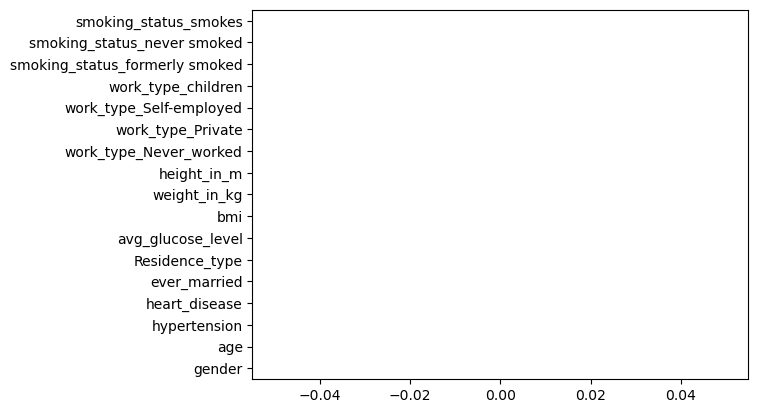

In [206]:
print(df.isna().sum())

df.isna().sum().plot.barh()

# STEP 4 Dimensionality Reduction PCA

In [208]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.657568,0.724138,0.841584,False,True,False,False,True,False,False
1,0,0.743652,0,0,1,0,0.679023,0.436725,0.517241,0.742574,False,False,True,False,False,True,False
2,1,0.975586,0,1,1,0,0.234512,0.558313,0.558621,0.742574,False,True,False,False,False,True,False
3,0,0.597168,0,0,1,1,0.536008,0.605459,0.496552,0.613861,False,True,False,False,False,False,True
4,0,0.963379,1,0,1,0,0.549349,0.344913,0.358621,0.683168,False,False,True,False,False,True,False


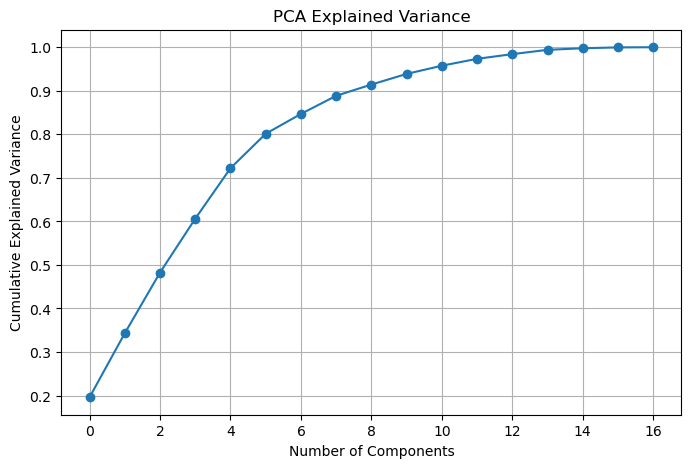

In [209]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA()
pca.fit(df)  # Scaled data is required for PCA

# Cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [210]:
pca = PCA(n_components=0.95)  # Retain enough components to explain 95% of variance
reduced_data = pca.fit_transform(df)  # Transform the data to reduced dimensions

# Convert to DataFrame for clarity
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])
print(reduced_df.head()) 

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.518684 -0.676472 -0.862891  0.239604  0.393076 -0.649579 -0.077852   
1  0.301817 -0.296797  1.240615 -0.512366 -0.126091  0.125559 -0.078961   
2  0.733790  0.228810 -0.070236 -0.745011  0.638289  0.015094  0.054141   
3  0.483045 -0.048886 -0.454114  0.718186 -0.444695  0.689629  0.072503   
4  0.450599 -0.422890  1.314838 -0.539441 -0.114521  0.141951 -0.488707   

        PC8       PC9      PC10      PC11  
0  0.098440  0.968334  0.200134  0.099395  
1 -0.225318  0.122506 -0.066168  0.429259  
2  0.032687  0.865569  0.048577 -0.417054  
3  0.002194  0.064005  0.150085  0.310289  
4  0.601674 -0.144413 -0.185990  0.176632  


In [211]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.657568,0.724138,0.841584,False,True,False,False,True,False,False
1,0,0.743652,0,0,1,0,0.679023,0.436725,0.517241,0.742574,False,False,True,False,False,True,False
2,1,0.975586,0,1,1,0,0.234512,0.558313,0.558621,0.742574,False,True,False,False,False,True,False
3,0,0.597168,0,0,1,1,0.536008,0.605459,0.496552,0.613861,False,True,False,False,False,False,True
4,0,0.963379,1,0,1,0,0.549349,0.344913,0.358621,0.683168,False,False,True,False,False,True,False


In [212]:
all_features= ['gender',
                  'age',
                  'hypertension',
                  'heart_disease',
                  'ever_married',	'Residence_type',	'avg_glucose_level',	'bmi',	'weight_in_kg',	'height_in_m',	'work_type_Never_worked',
                  'work_type_Private',
                  'work_type_Self-employed',	'work_type_children',
                  'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']

loadings = pd.DataFrame(
    pca.components_,
    columns=all_features,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
print(loadings)


        gender       age  hypertension  heart_disease  ever_married  \
PC1  -0.129001  0.311994      0.100034       0.045795      0.593333   
PC2  -0.256020 -0.221999     -0.098509      -0.075954     -0.374300   
PC3  -0.423484  0.064437      0.047845      -0.011821      0.068196   
PC4  -0.336654 -0.026740     -0.035751      -0.022304     -0.044976   
PC5   0.761429  0.006910      0.037289       0.030220     -0.004178   
PC6   0.040777 -0.003099      0.018562       0.011426      0.088131   
PC7  -0.008822 -0.095619     -0.404142      -0.110387      0.630164   
PC8  -0.064955  0.051924      0.839029       0.118230      0.116549   
PC9  -0.051174  0.217481     -0.270144       0.840238     -0.088652   
PC10 -0.007877 -0.009030     -0.101243       0.045390     -0.073162   
PC11 -0.015644  0.002738     -0.119769      -0.434050     -0.040235   

      Residence_type  avg_glucose_level       bmi  weight_in_kg  height_in_m  \
PC1        -0.011579           0.056296  0.113849      0.013155    

In [213]:
print(pca.components_.shape)  # (n_components, n_features)
print(len(all_features))  

(11, 17)
17


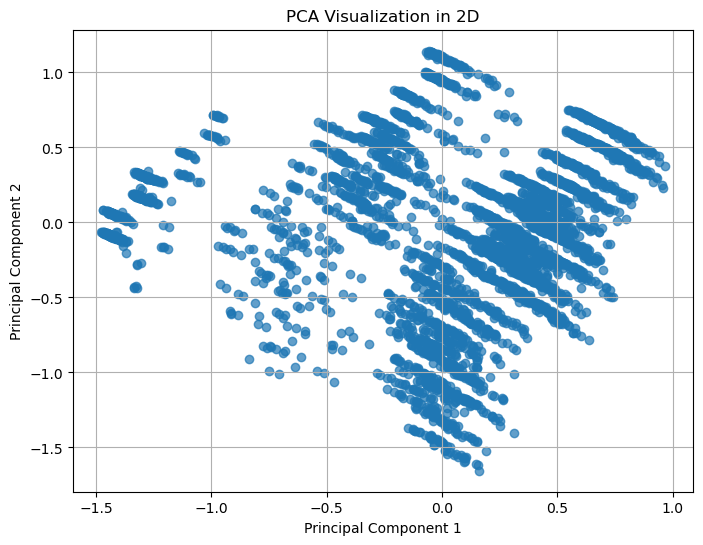

In [214]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization in 2D')
plt.grid()
plt.show()


# STEP 5 EDA

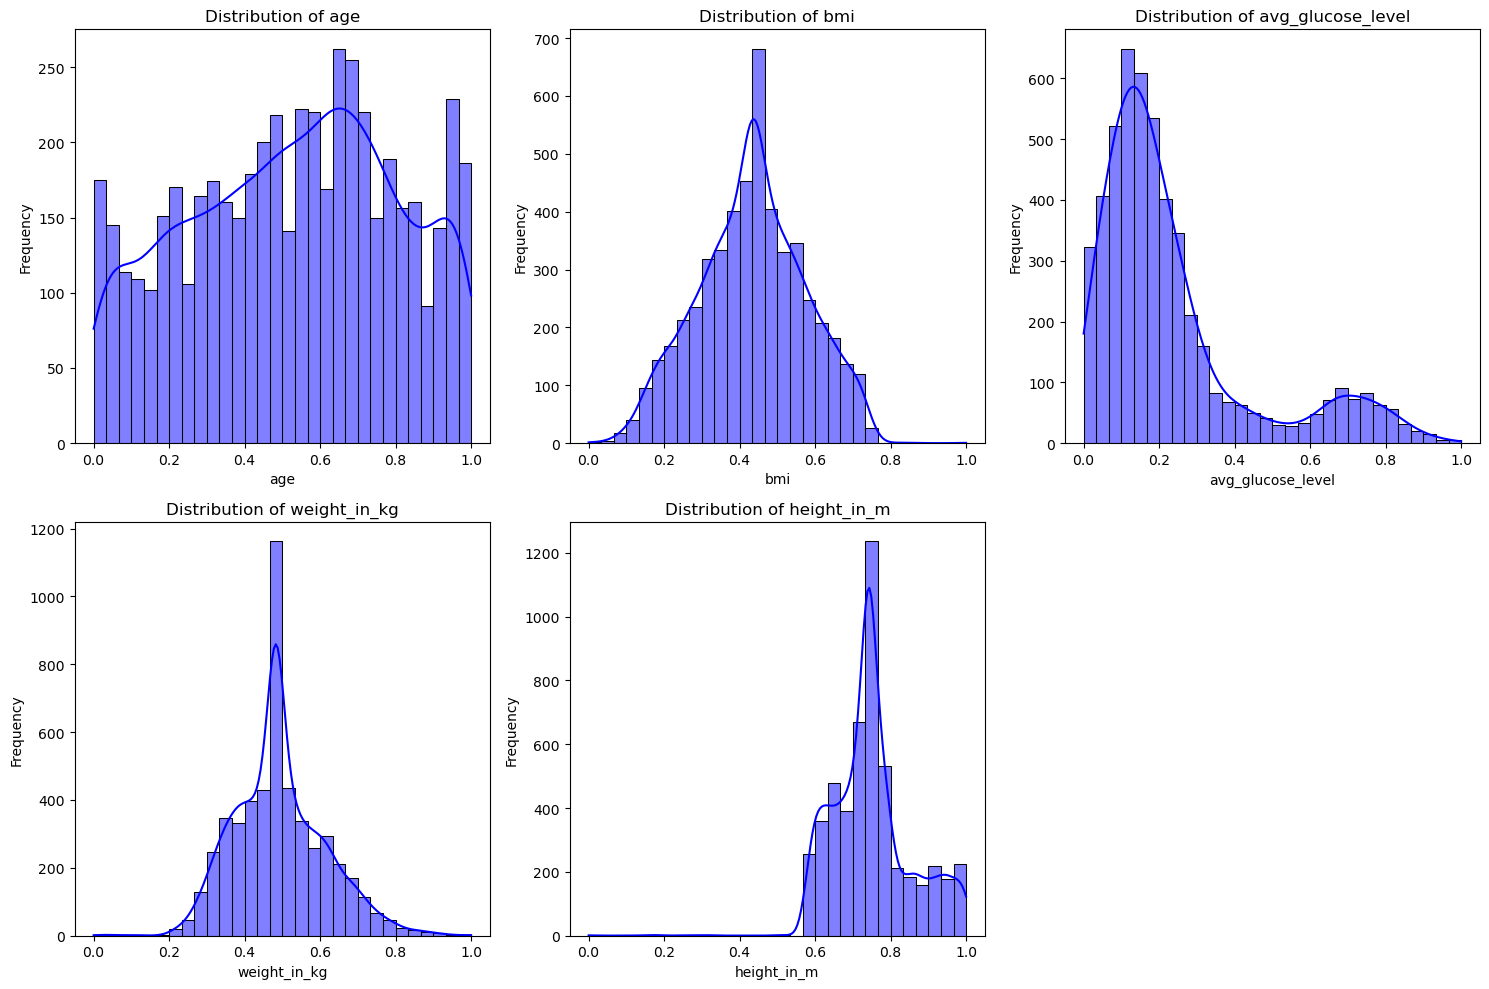

In [216]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue') 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

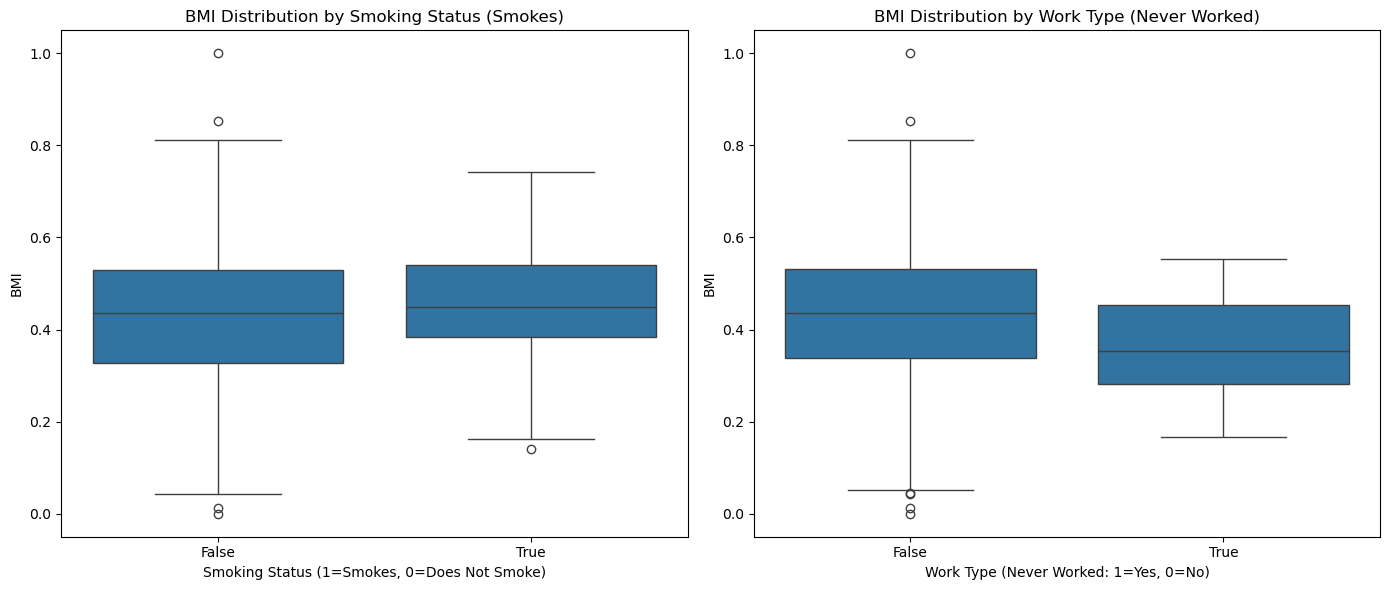

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Boxplot for smoking status vs. BMI
sns.boxplot(x=df['smoking_status_smokes'], y=df['bmi'], ax=axes[0])
axes[0].set_title('BMI Distribution by Smoking Status (Smokes)')
axes[0].set_xlabel('Smoking Status (1=Smokes, 0=Does Not Smoke)')
axes[0].set_ylabel('BMI')

# Boxplot for work type (Never Worked) vs. BMI
sns.boxplot(x=df['work_type_Never_worked'], y=df['bmi'], ax=axes[1])
axes[1].set_title('BMI Distribution by Work Type (Never Worked)')
axes[1].set_xlabel('Work Type (Never Worked: 1=Yes, 0=No)')
axes[1].set_ylabel('BMI')

# Adjust layout
plt.tight_layout()
plt.show()


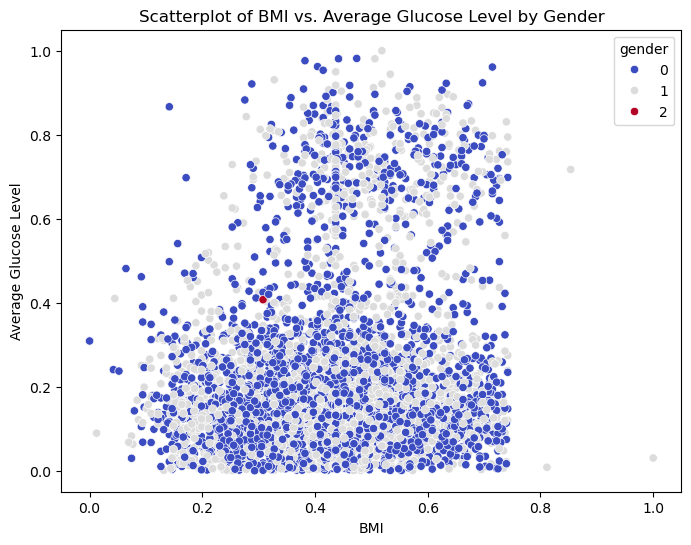

In [218]:
# Scatterplot between two key variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='gender', data=df, palette='coolwarm')
plt.title('Scatterplot of BMI vs. Average Glucose Level by Gender')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()


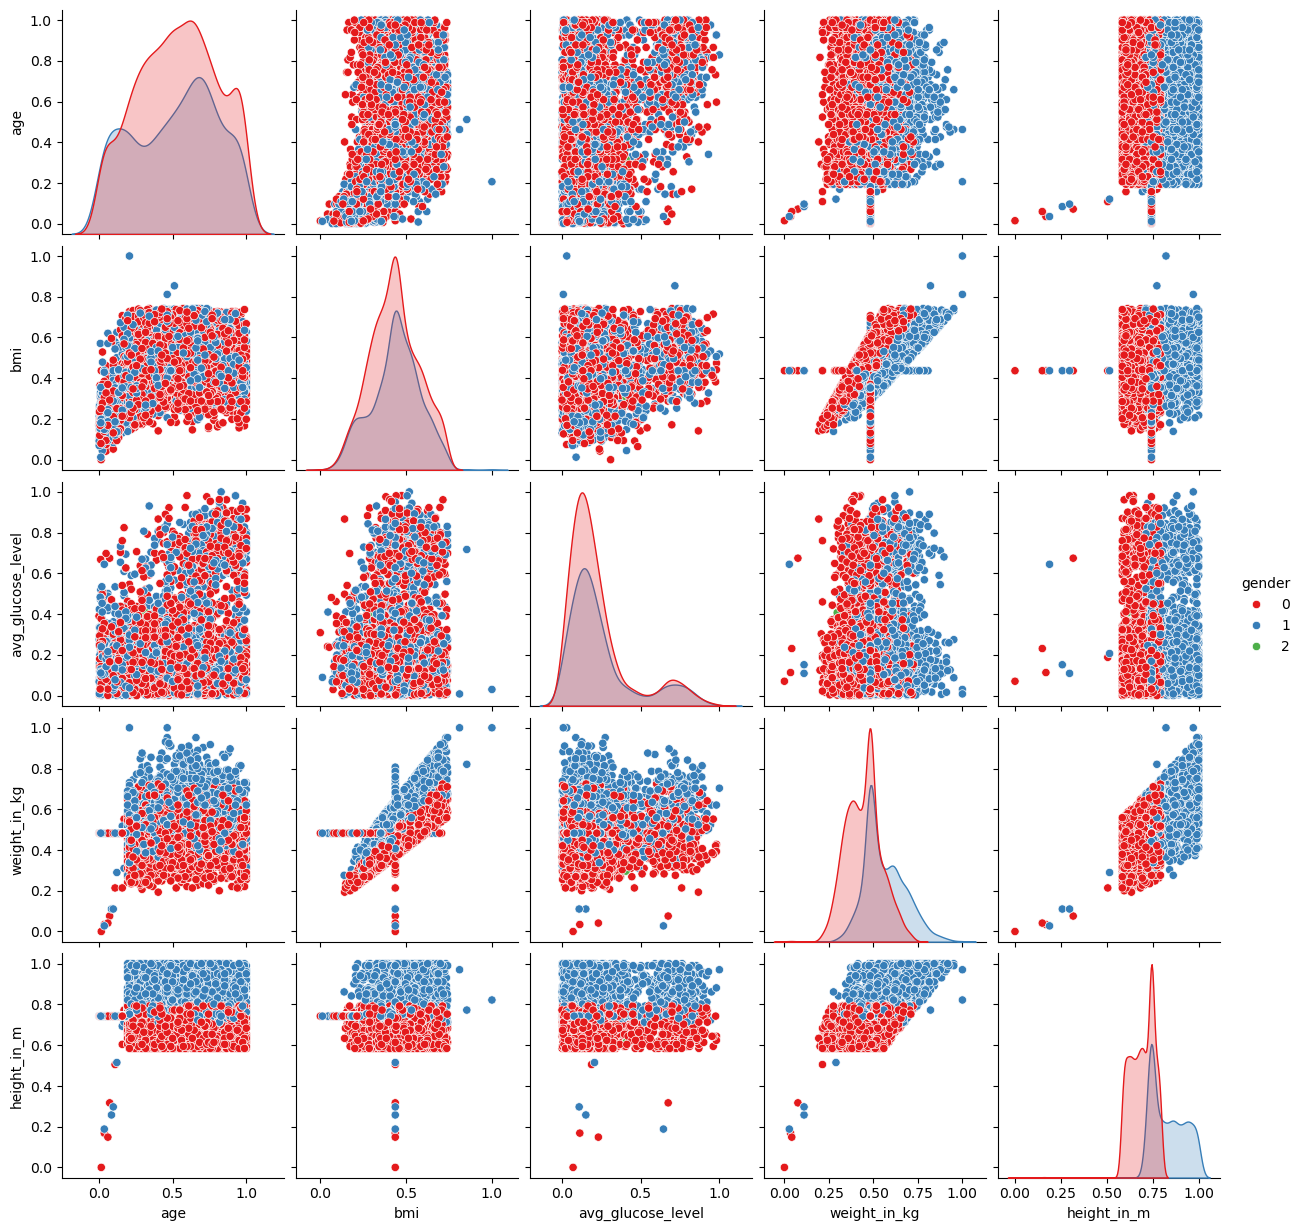

In [219]:
# Pairplot to visualize relationships between all numerical features
sns.pairplot(df[numerical_features + ['gender']], hue='gender', palette='Set1', diag_kind='kde')
plt.show()


#df['gender']            ({'Other':2 ,'Male': 1, 'Female': 0})
#df['ever_married']      ({'Yes': 1, 'No': 0})
#df['Residence_type']    ({'Urban': 1, 'Rural': 0})


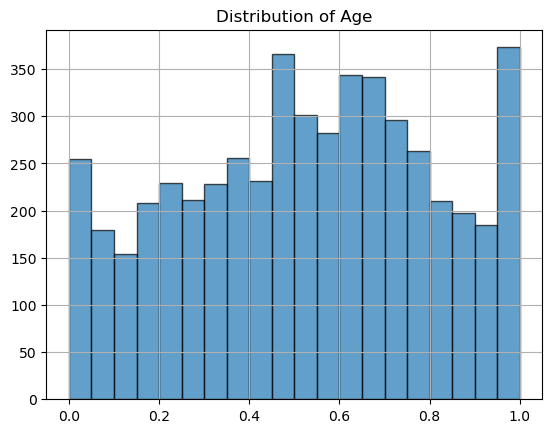

In [220]:
# 1. Basic Distributions
df['age'].hist(bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')
plt.show()

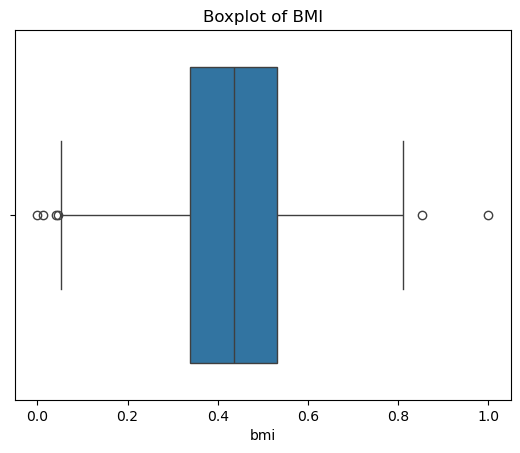

In [221]:
# 2. Boxplot of BMI
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()


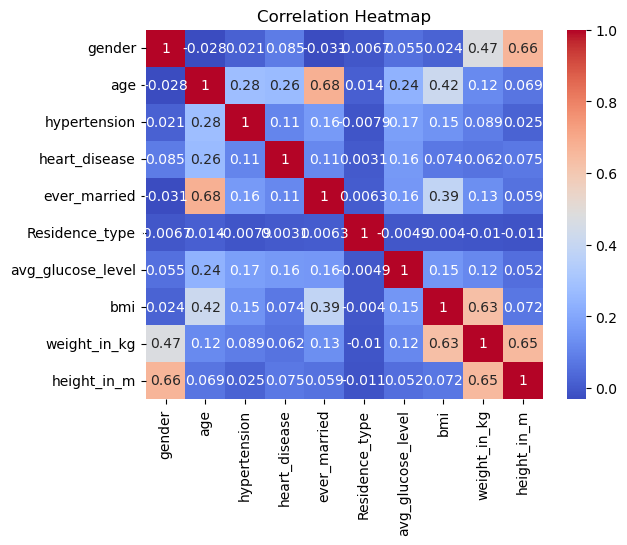

In [222]:
# 3. Correlation Heatmap
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

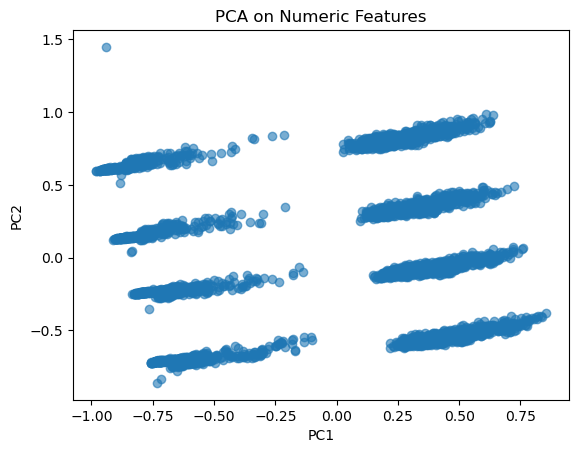

In [223]:
# 4. PCA Visualization
numeric_df = df.select_dtypes(include=[np.number]).dropna()
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(numeric_df)
df_pca = pd.DataFrame(pca_coords, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6)
plt.title('PCA on Numeric Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

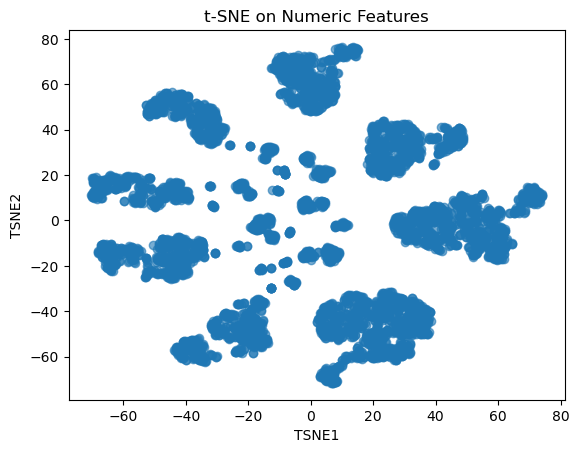

In [224]:
from sklearn.manifold import TSNE

# 5. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(numeric_df)
df_tsne = pd.DataFrame(tsne_coords, columns=['TSNE1', 'TSNE2'])
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], alpha=0.6)
plt.title('t-SNE on Numeric Features')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [225]:
numeric_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m
0,1,0.816895,0,1,1,1,0.801265,0.657568,0.724138,0.841584
1,0,0.743652,0,0,1,0,0.679023,0.436725,0.517241,0.742574
2,1,0.975586,0,1,1,0,0.234512,0.558313,0.558621,0.742574
3,0,0.597168,0,0,1,1,0.536008,0.605459,0.496552,0.613861
4,0,0.963379,1,0,1,0,0.549349,0.344913,0.358621,0.683168
...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,1,0.132167,0.436725,0.324138,0.613861
5106,0,0.987793,0,0,1,1,0.323516,0.736973,0.558621,0.584158
5107,0,0.426270,0,0,1,0,0.128658,0.513648,0.420690,0.594059
5108,1,0.621582,0,0,1,0,0.513203,0.387097,0.524138,0.900990


# STEP 6 k-MEANS AS CLUSTERING ALGORITHM

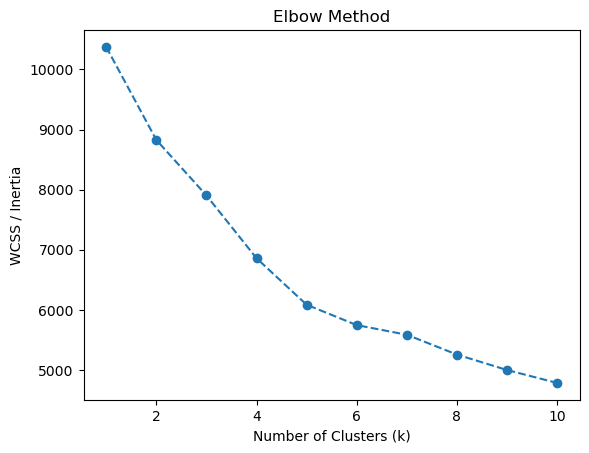

In [227]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)  # Assuming df is your numeric dataset
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()

# STEP 7 BUILD THE MODEL

In [229]:
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f'k={k}, Silhouette Score={score:.4f}')


k=2, Silhouette Score=0.1960
k=3, Silhouette Score=0.1639
k=4, Silhouette Score=0.2023
k=5, Silhouette Score=0.2166
k=6, Silhouette Score=0.2114
k=7, Silhouette Score=0.2097
k=8, Silhouette Score=0.2122
k=9, Silhouette Score=0.2205
k=10, Silhouette Score=0.2230
k=11, Silhouette Score=0.2085
k=12, Silhouette Score=0.2093
k=13, Silhouette Score=0.2189
k=14, Silhouette Score=0.2119


In [230]:
optimal_k = 3  # Replace with the value of k you selected
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df)  # Add cluster labels to DataFrame

sil_score = silhouette_score(df, df['Cluster'])
print(f'Final Silhouette Score: {sil_score:.4f}')


Final Silhouette Score: 0.3116


# STEP 8 CLUSTER EVALUATION

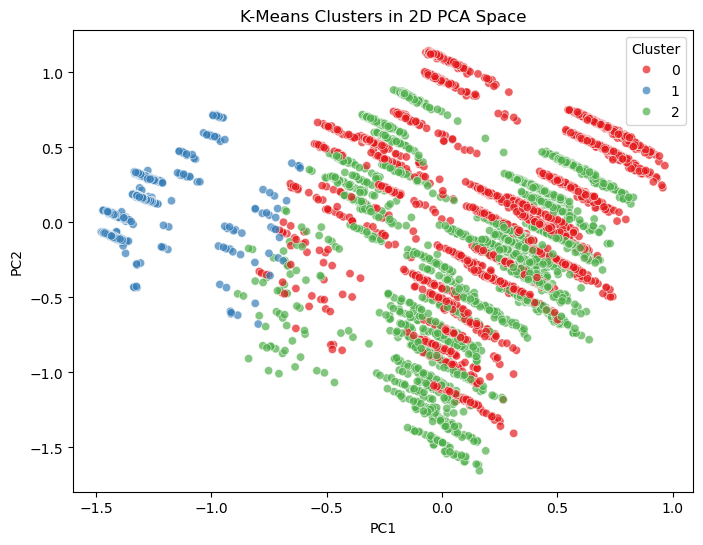

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.drop('Cluster', axis=1))

import matplotlib.pyplot as plt
import seaborn as sns

df_pca = pd.DataFrame(pca_features, columns=['PC1','PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Cluster', 
    data=df_pca, 
    palette='Set1', alpha=0.7
)
plt.title('K-Means Clusters in 2D PCA Space')
plt.show()


<Axes: xlabel='Cluster', ylabel='bmi'>

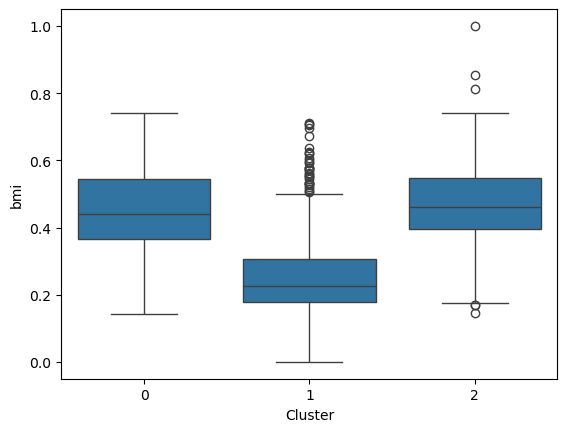

In [233]:
import seaborn as sns
sns.boxplot(x='Cluster', y='bmi', data=df)


In [234]:
import pandas as pd
from sklearn.decomposition import PCA

# Suppose 'df' is your numeric dataset (after encoding and/or scaling if necessary)
pca_3 = PCA(n_components=3)
pca_features_3 = pca_3.fit_transform(df)

# Convert the resulting array to a DataFrame
df_pca_3 = pd.DataFrame(
    data=pca_features_3, 
    columns=['PC1', 'PC2', 'PC3']
)

print("Explained Variance Ratio of 3 PCs:", pca_3.explained_variance_ratio_)
print("Sum of Explained Variance:", pca_3.explained_variance_ratio_.sum())
df_pca_3.head()


Explained Variance Ratio of 3 PCs: [0.3657841  0.13723324 0.10225122]
Sum of Explained Variance: 0.6052685525121643


,PC1,PC2,PC3
0,1.170782,0.646987,-0.256908
1,-1.062155,0.210110,-0.740930
2,1.023170,0.801976,0.342696
3,-0.941607,0.443180,0.056511
4,-1.070899,0.360101,-0.881365


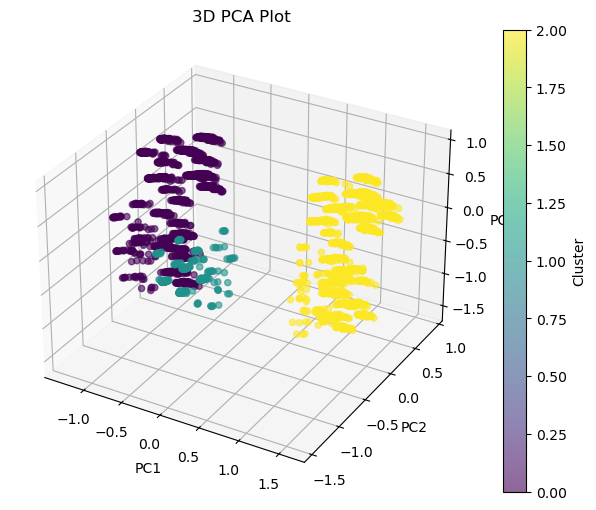

In [235]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(
    df_pca_3['PC1'], 
    df_pca_3['PC2'], 
    df_pca_3['PC3'], 
    c=df['Cluster'] if 'Cluster' in df.columns else None, 
    cmap='viridis', 
    alpha=0.6
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')


if 'Cluster' in df.columns:
    plt.colorbar(sc, label='Cluster')

plt.show()


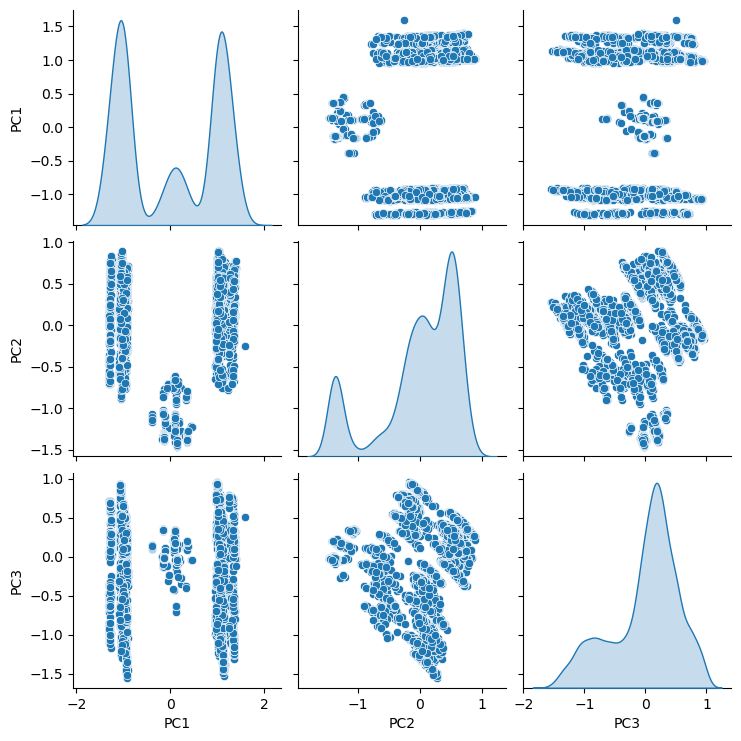

In [236]:
import seaborn as sns
sns.pairplot(df_pca_3, diag_kind='kde')


In [237]:
df.groupby('Cluster').mean()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
Cluster,,,,,,,,,,,,,,,,,
0,0.133569,0.589528,0.112782,0.043786,0.750111,0.734631,0.235796,0.455273,0.458335,0.709587,0.005750,0.649713,0.191066,0.000000,0.108359,0.665192,0.106148
1,0.529332,0.094431,0.000000,0.002729,0.000000,0.507503,0.180644,0.254997,0.475298,0.738427,0.012278,0.000000,0.012278,0.938608,0.021828,0.080491,0.008186
2,0.674386,0.609288,0.114839,0.082703,0.783081,0.266068,0.254339,0.472245,0.533857,0.797652,0.000000,0.687618,0.178639,0.000000,0.294896,0.155482,0.256616


In [238]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Final Silhouette Score: {sil_score:.4f}")

Final Silhouette Score: 0.1639


In [239]:
# Convert scaled data back to the original scale
unscaled_data = minmax_scaler.inverse_transform(df[numerical_features])

# Convert back to a DataFrame for visualization
unscaled_df = pd.DataFrame(unscaled_data, columns=numerical_features)

print("Unscaled Data:")
print(unscaled_df)


Unscaled Data:
       age   bmi  avg_glucose_level  weight_in_kg  height_in_m
0     67.0  36.6             228.69         116.0         1.78
1     61.0  27.7             202.21          86.0         1.68
2     80.0  32.6             105.92          92.0         1.68
3     49.0  34.5             171.23          83.0         1.55
4     79.0  24.0             174.12          63.0         1.62
...    ...   ...                ...           ...          ...
5105  80.0  27.7              83.75          58.0         1.55
5106  81.0  39.8             125.20          92.0         1.52
5107  35.0  30.8              82.99          72.0         1.53
5108  51.0  25.7             166.29          87.0         1.84
5109  44.0  26.1              85.28          71.0         1.65

[5110 rows x 5 columns]


# Result

In [241]:
# Group by Cluster and calculate means
cluster_means = df.groupby('Cluster').mean()

# Preview the data
print(cluster_means)


           gender       age  hypertension  heart_disease  ever_married  \
Cluster                                                                  
0        0.133569  0.589528      0.112782       0.043786      0.750111   
1        0.529332  0.094431      0.000000       0.002729      0.000000   
2        0.674386  0.609288      0.114839       0.082703      0.783081   

         Residence_type  avg_glucose_level       bmi  weight_in_kg  \
Cluster                                                              
0              0.734631           0.235796  0.455273      0.458335   
1              0.507503           0.180644  0.254997      0.475298   
2              0.266068           0.254339  0.472245      0.533857   

         height_in_m  work_type_Never_worked  work_type_Private  \
Cluster                                                           
0           0.709587                0.005750           0.649713   
1           0.738427                0.012278           0.000000   
2         

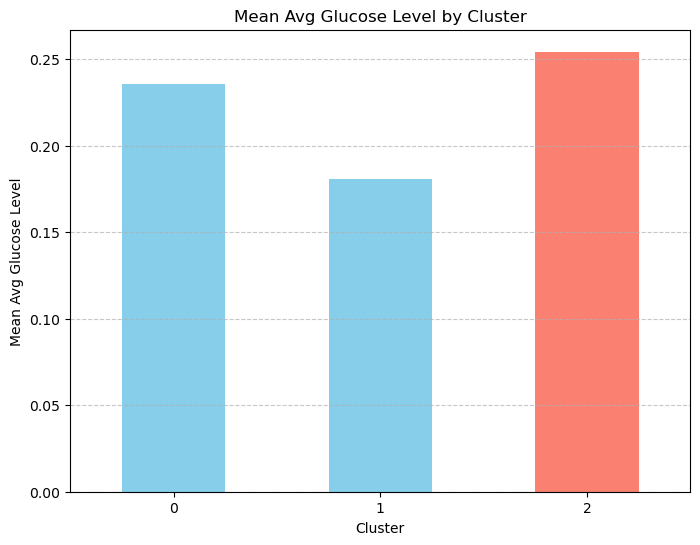

In [242]:
import matplotlib.pyplot as plt

# Identify the cluster with the highest avg_glucose_level
highest_cluster = cluster_means['avg_glucose_level'].idxmax()

# Create a color array: skyblue for all bars, and a different color for the highest
colors = ['skyblue' if idx != highest_cluster else 'salmon' for idx in cluster_means.index]

# Plot bar chart with the highlighted bar
plt.figure(figsize=(8, 6))
cluster_means['avg_glucose_level'].plot(kind='bar', color=colors)
plt.title('Mean Avg Glucose Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Avg Glucose Level')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [243]:
# Group by Cluster and calculate means
cluster_means = df.groupby('Cluster').mean()

# Extract smoking and work type columns
smoking_work_means = cluster_means[[
    'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 
    'smoking_status_smokes',
    'work_type_Never_worked',
    'work_type_Private',
    'work_type_Self-employed',
    'work_type_children'
]]

# Preview the data
print(smoking_work_means)


         smoking_status_formerly smoked  smoking_status_never smoked  \
Cluster                                                                
0                              0.108359                     0.665192   
1                              0.021828                     0.080491   
2                              0.294896                     0.155482   

         smoking_status_smokes  work_type_Never_worked  work_type_Private  \
Cluster                                                                     
0                     0.106148                0.005750           0.649713   
1                     0.008186                0.012278           0.000000   
2                     0.256616                0.000000           0.687618   

         work_type_Self-employed  work_type_children  
Cluster                                               
0                       0.191066            0.000000  
1                       0.012278            0.938608  
2                       0.178639 

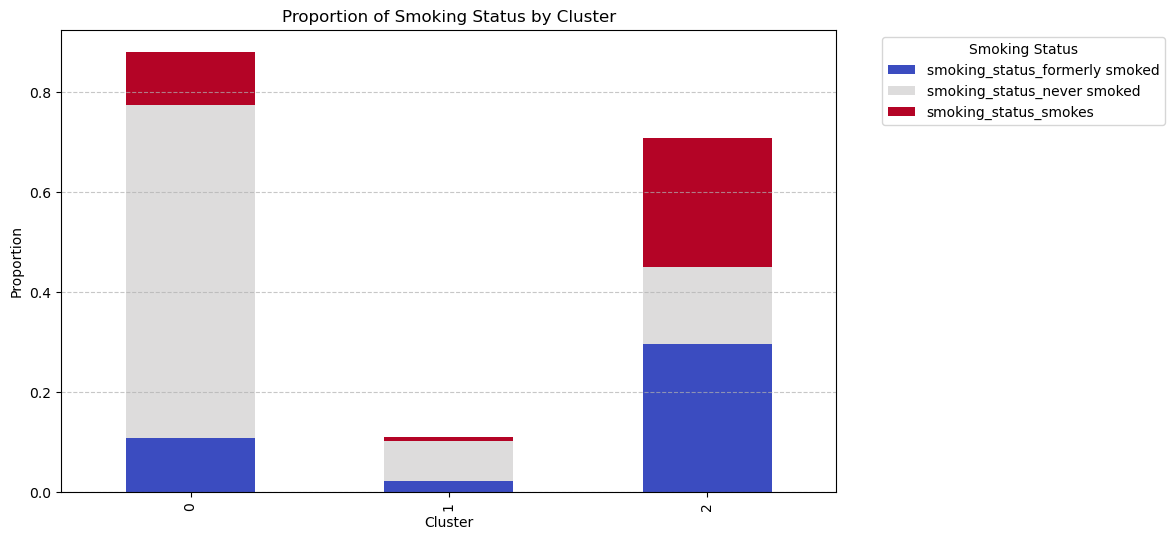

In [244]:
import matplotlib.pyplot as plt

# Smoking status proportions by cluster
smoking_means = smoking_work_means[['smoking_status_formerly smoked', 
                                    'smoking_status_never smoked', 
                                    'smoking_status_smokes']]

# Plot stacked bar chart
smoking_means.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Proportion of Smoking Status by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


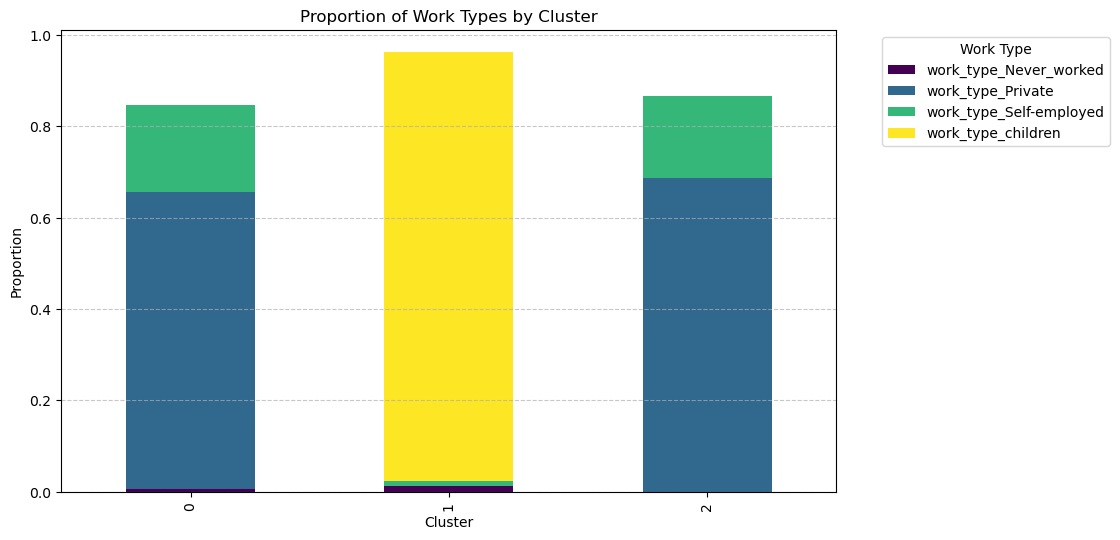

In [245]:
# Work type proportions by cluster
work_type_means = smoking_work_means[['work_type_Never_worked', 
                                      'work_type_Private', 
                                      'work_type_Self-employed', 
                                      'work_type_children']]

# Plot stacked bar chart
work_type_means.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Proportion of Work Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


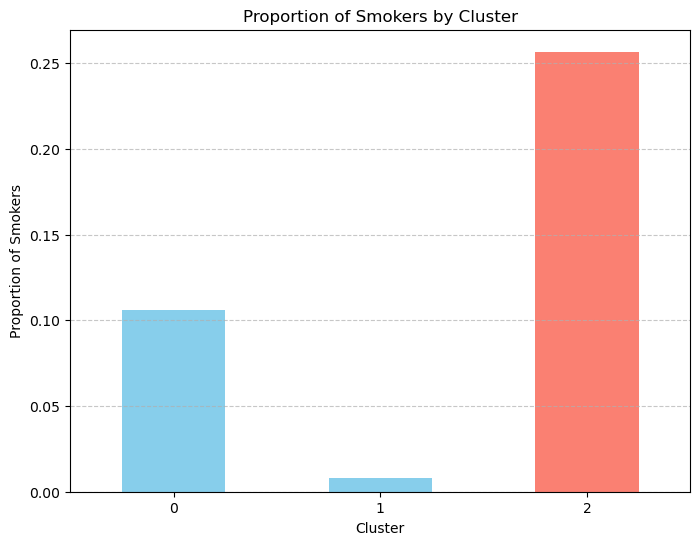

In [246]:
# Find the cluster with the highest proportion of smokers
highest_smoking_cluster = smoking_work_means['smoking_status_smokes'].idxmax()

# Highlight in bar chart
colors = ['salmon' if idx == highest_smoking_cluster else 'skyblue' for idx in smoking_work_means.index]

# Plot for smokers
plt.figure(figsize=(8, 6))
smoking_work_means['smoking_status_smokes'].plot(kind='bar', color=colors)
plt.title('Proportion of Smokers by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Smokers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


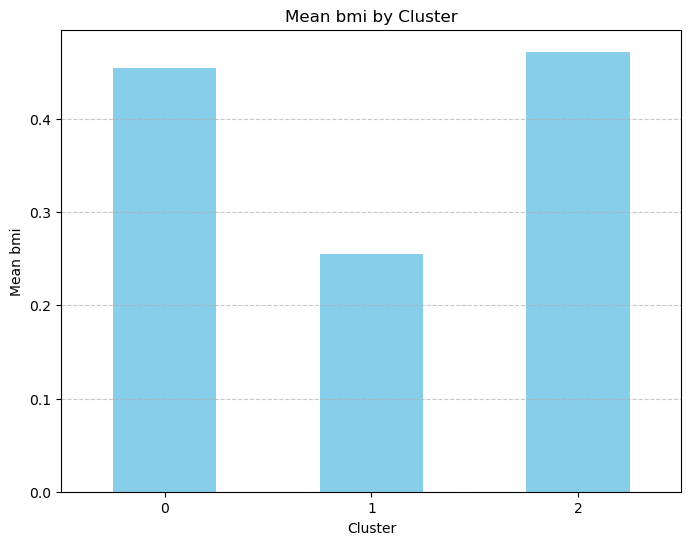

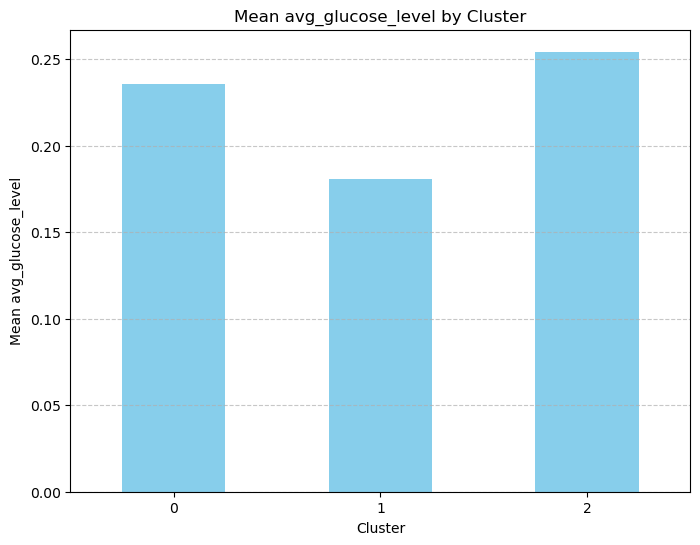

In [247]:
import matplotlib.pyplot as plt

# Visualize mean values for a specific feature across clusters
for feature in ['bmi', 'avg_glucose_level']:
    plt.figure(figsize=(8, 6))
    cluster_means[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## Cluster 2:
Key Characteristics:

Highest BMI: This cluster has individuals with significantly higher body mass index compared to others.
Smokers: Majority of the individuals in this cluster are smokers.
Possible Interpretation:

This cluster might represent individuals at higher health risks, particularly for obesity-related conditions and smoking-associated diseases.



## Cluster 1:
Key Characteristics:

Children: This cluster primarily includes children.
Never Worked: Members of this cluster are not part of the workforce.
Lowest Average Glucose Level: Indicates better glucose regulation, possibly due to age and lifestyle.
Possible Interpretation:

This cluster likely represents a younger demographic with lower health risks and minimal workforce participation.



## Cluster 0:
Key Characteristics:
Moderate Levels Across All Metrics: BMI, smoking status, and glucose levels are within average ranges.
Possible Interpretation:
This cluster represents a balanced group with neither extreme health risks nor exceptional protective factors.